<h1 align="center">California Housing Price Model Training Process</h1>

# 1. Introduction

This notebook walks through the complete process of training a machine learning model for predicting California housing prices. We'll cover data loading, exploration, preprocessing, model training, evaluation, and saving the model for production use.

# 2. Environment Setup

First, let's import all the necessary libraries for our data processing and modeling tasks.

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import os
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Set up visualization settings
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 3. Data Acquisition

We'll use the California Housing dataset from scikit-learn, which contains information from the 1990 California census.

In [2]:
# Load the California Housing dataset
logging.info("Loading California Housing dataset")
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Create a pandas DataFrame for easier exploration
feature_names = housing.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['median_house_value'] = y

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nFeatures: {feature_names}")
print(f"\nTarget: median_house_value (in $100,000)")
df.head()

2025-04-23 03:50:05,834 - INFO - Loading California Housing dataset


Dataset shape: (20640, 9)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target: median_house_value (in $100,000)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3.1. Understanding the Features

The California Housing dataset includes the following features:
- **MedInc**: Median income in the block group (in tens of thousands of USD)
- **HouseAge**: Median house age in the block group
- **AveRooms**: Average number of rooms per household
- **AveBedrms**: Average number of bedrooms per household
- **Population**: Block group population
- **AveOccup**: Average number of household members
- **Latitude**: Block group latitude
- **Longitude**: Block group longitude

The target variable is:
- **median_house_value**: Median house value in block group (in $100,000)

# 4. Exploratory Data Analysis

Let's examine the dataset to understand its characteristics, distributions, and relationships between variables.

## 4.1. Data Overview

In [3]:
# Basic statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 4.2. Check for Missing Values

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64


## 4.3. Data Distributions

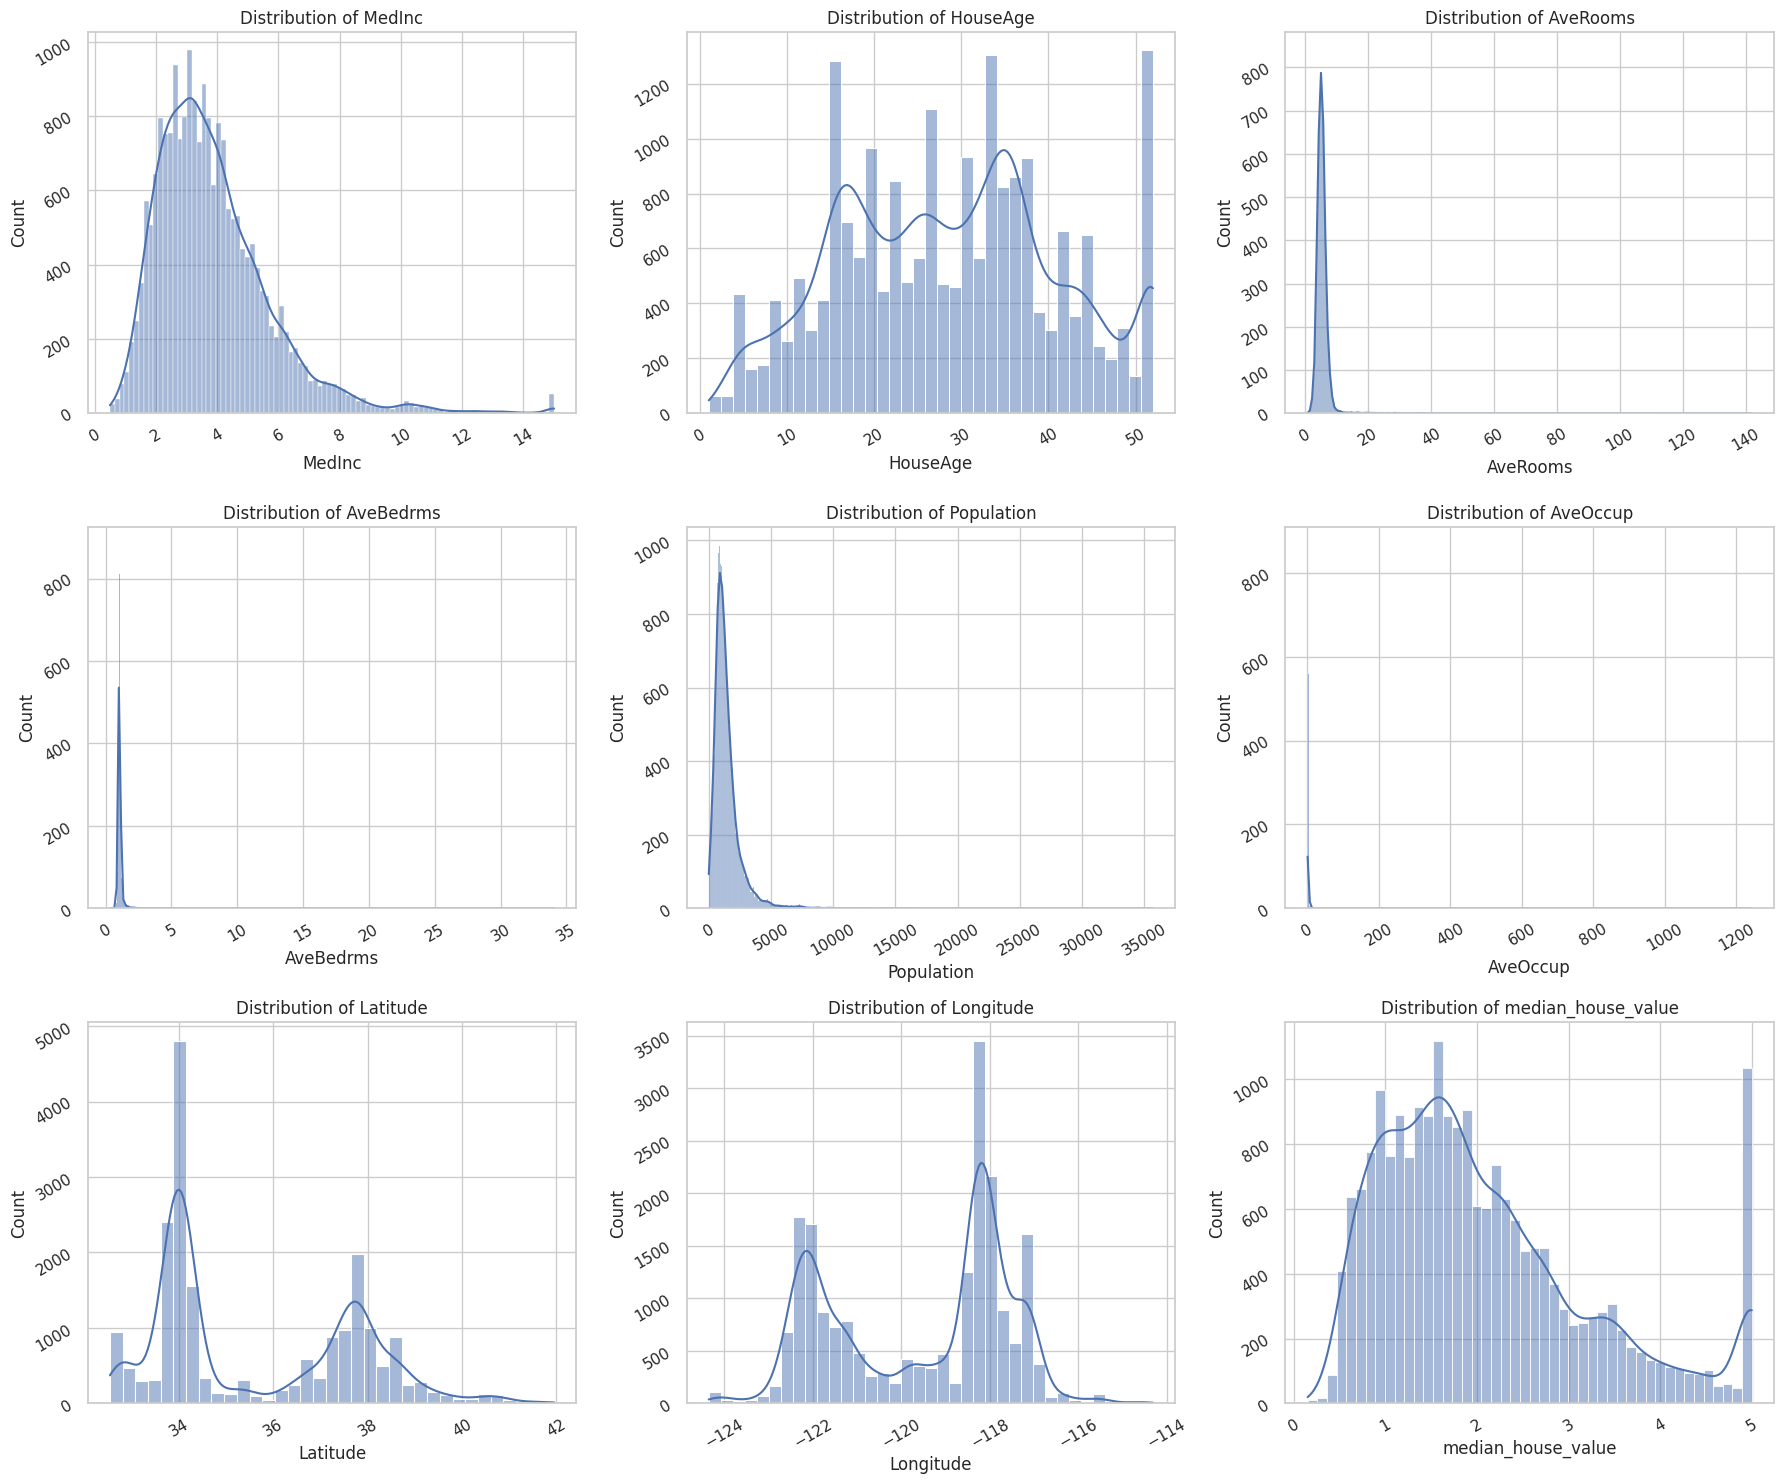

In [5]:
# Plot histograms for all features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(labelrotation=30)

plt.tight_layout()
plt.show()

## 4.4. Correlation Analysis

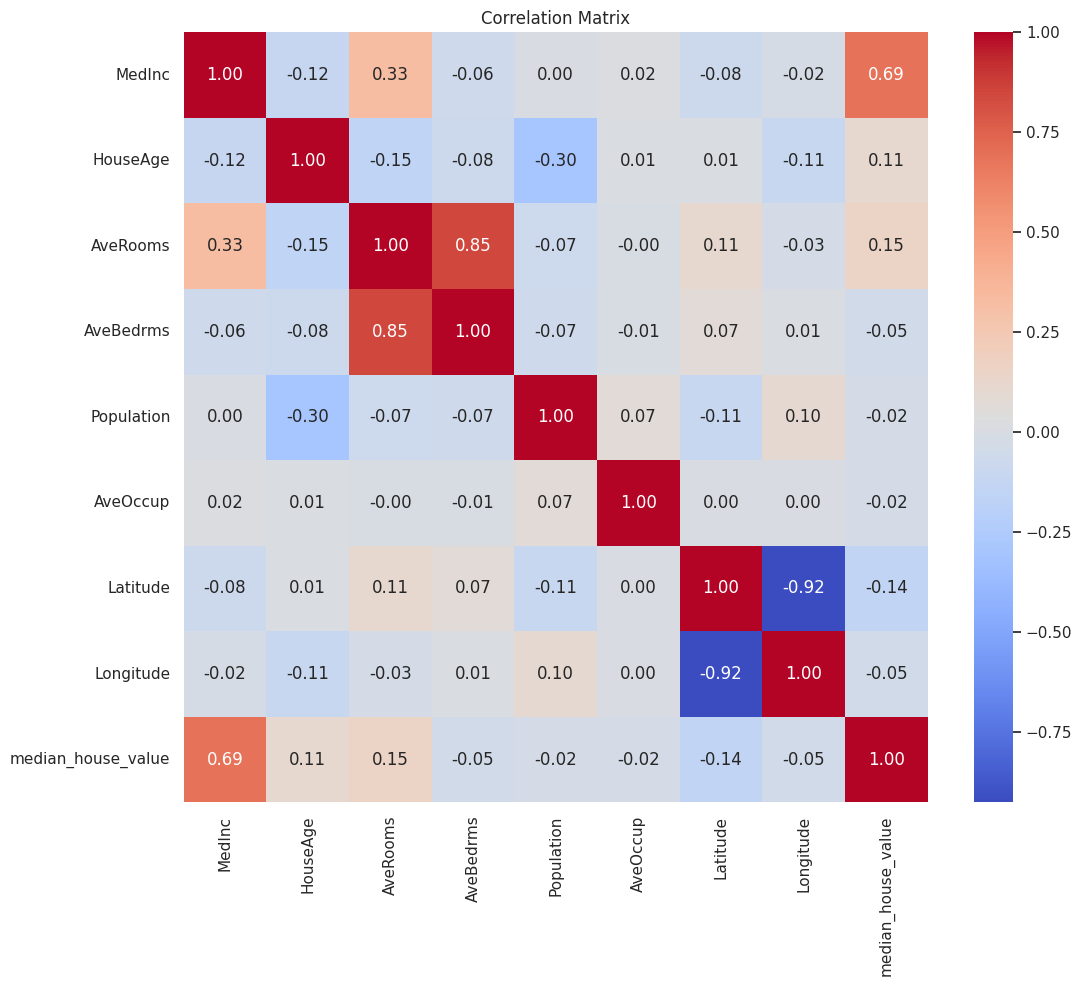

In [6]:
# Compute and visualize correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 4.5. Geographic Distribution

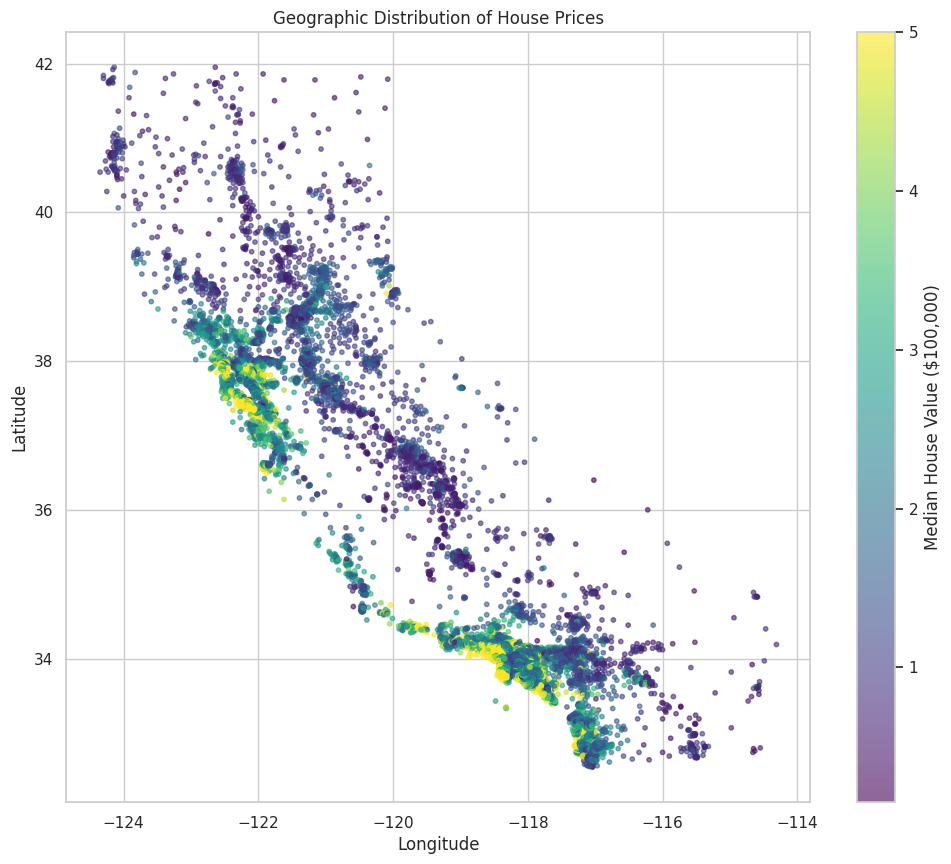

In [7]:
# Visualize geographic distribution of house prices
plt.figure(figsize=(12, 10))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                      c=df['median_house_value'], cmap='viridis', 
                      alpha=0.6, s=10)
plt.colorbar(scatter, label='Median House Value ($100,000)')
plt.title('Geographic Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 4.6. Feature Relationships with Target

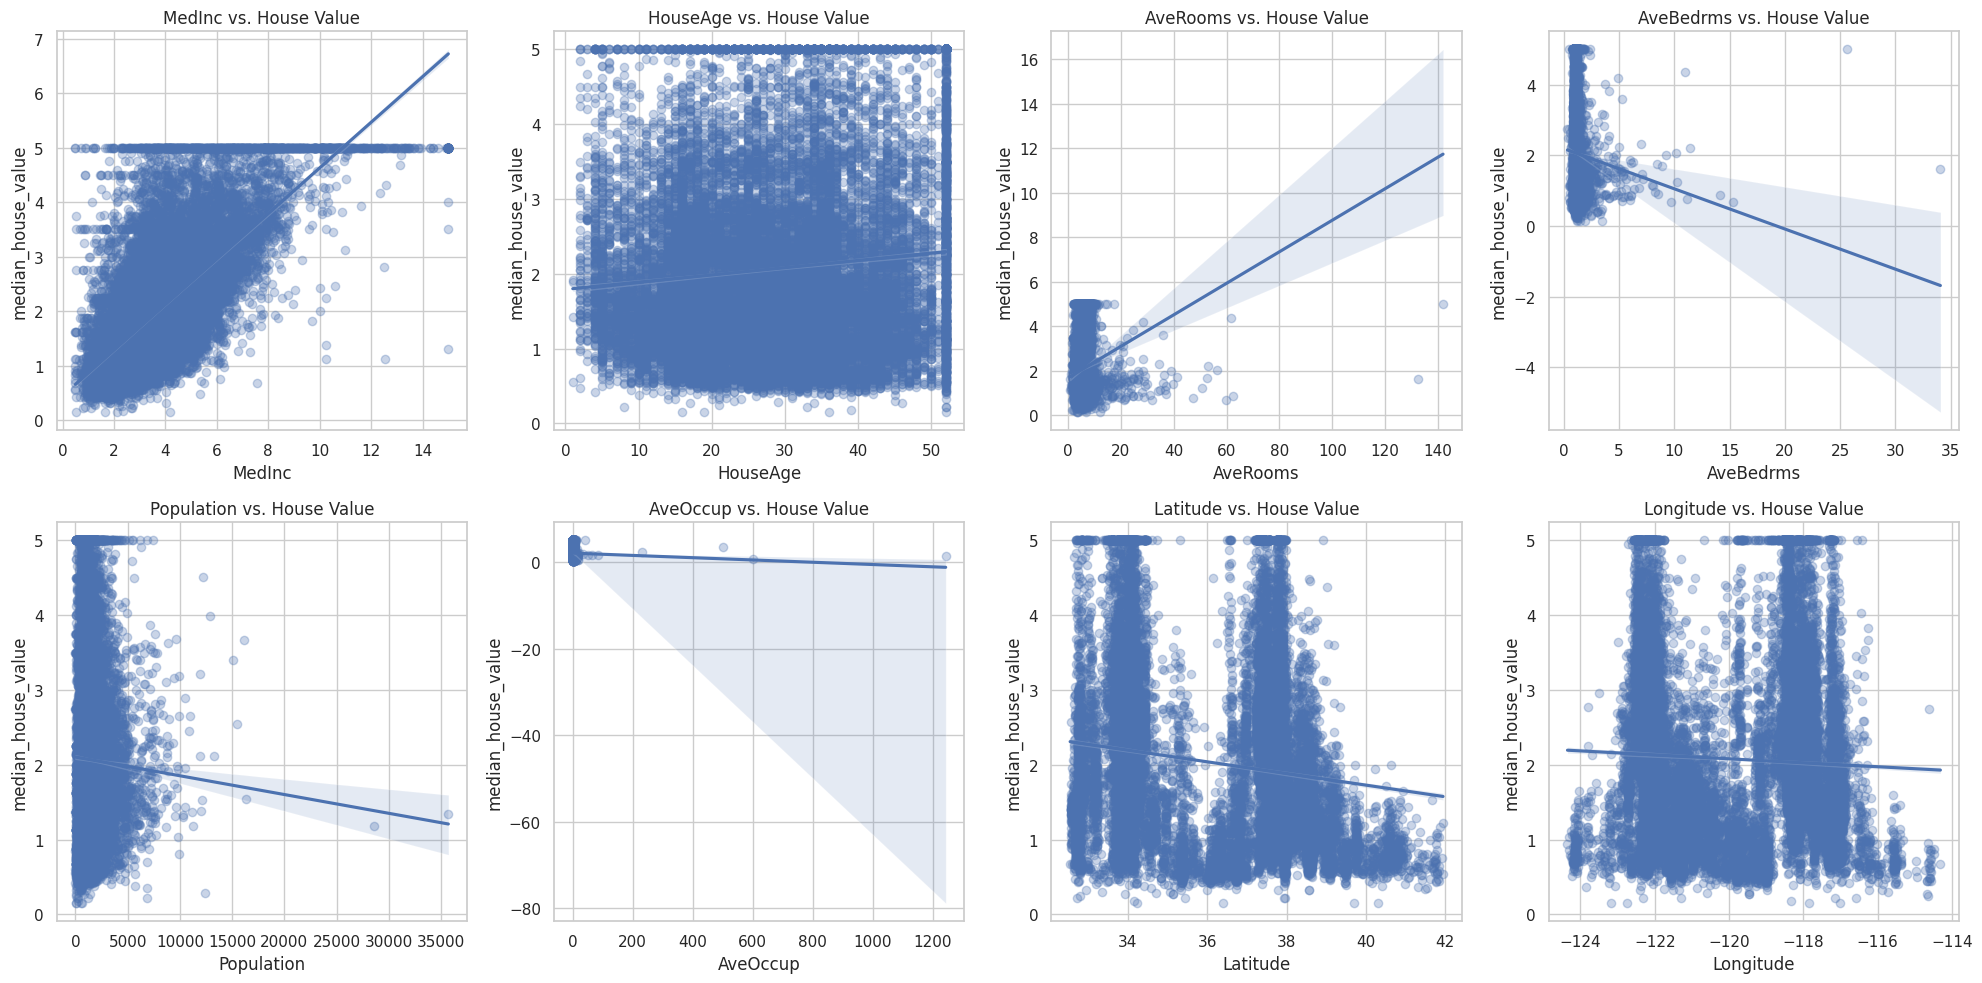

In [8]:
# Create scatter plots of features vs. target
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    sns.regplot(x=feature, y='median_house_value', data=df, ax=axes[i], scatter_kws={'alpha':0.3})
    axes[i].set_title(f'{feature} vs. House Value')

plt.tight_layout()
plt.show()

# 5. Data Preprocessing

Based on our exploratory analysis, let's prepare the data for model training.

## 5.1. Feature Selection

In [9]:
# We'll use all available features for this example
selected_features = feature_names
X = df[selected_features].values
y = df['median_house_value'].values

print(f"Selected features: {selected_features}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X shape: (20640, 8)
y shape: (20640,)


## 5.2. Data Splitting

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 16512 samples
Testing set: 4128 samples


## 5.2. Data Splitting

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 16512 samples
Testing set: 4128 samples


# 6. Model Training

We'll start with a simple linear regression model to establish a baseline.

In [12]:
# Train a linear regression model
logging.info("Training linear regression model")
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})
print("Model coefficients:")
print(coef_df.sort_values(by='Coefficient', ascending=False))
print(f"Intercept: {model.intercept_:.4f}")

2025-04-23 03:50:53,343 - INFO - Training linear regression model


Model coefficients:
      Feature  Coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
1    HouseAge     0.009724
4  Population    -0.000002
5    AveOccup    -0.003526
2    AveRooms    -0.123323
6    Latitude    -0.419792
7   Longitude    -0.433708
Intercept: -37.0233


# 7. Model Evaluation

Let's evaluate our model's performance on both the training and testing datasets.

In [13]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("Training set metrics:")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  R²: {train_r2:.4f}")
print("\nTest set metrics:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R²: {test_r2:.4f}")

Training set metrics:
  MSE: 0.5179
  RMSE: 0.7197
  R²: 0.6126

Test set metrics:
  MSE: 0.5559
  RMSE: 0.7456
  R²: 0.5758


## 7.1. Residual Analysis

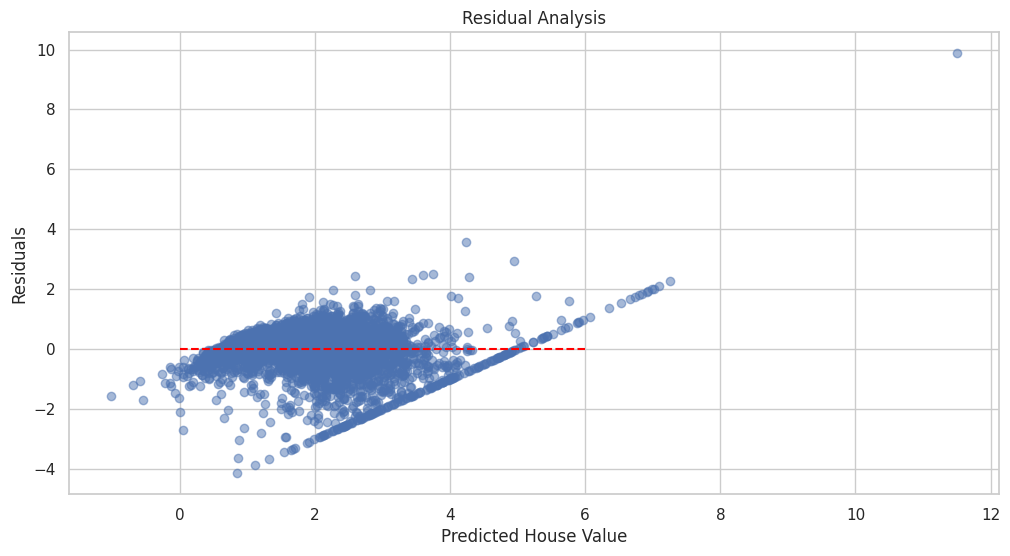

In [14]:
# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(y_test_pred, y_test_pred - y_test, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=6, colors='red', linestyles='--')
plt.xlabel('Predicted House Value')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True)
plt.show()

## 7.2. Actual vs. Predicted Values

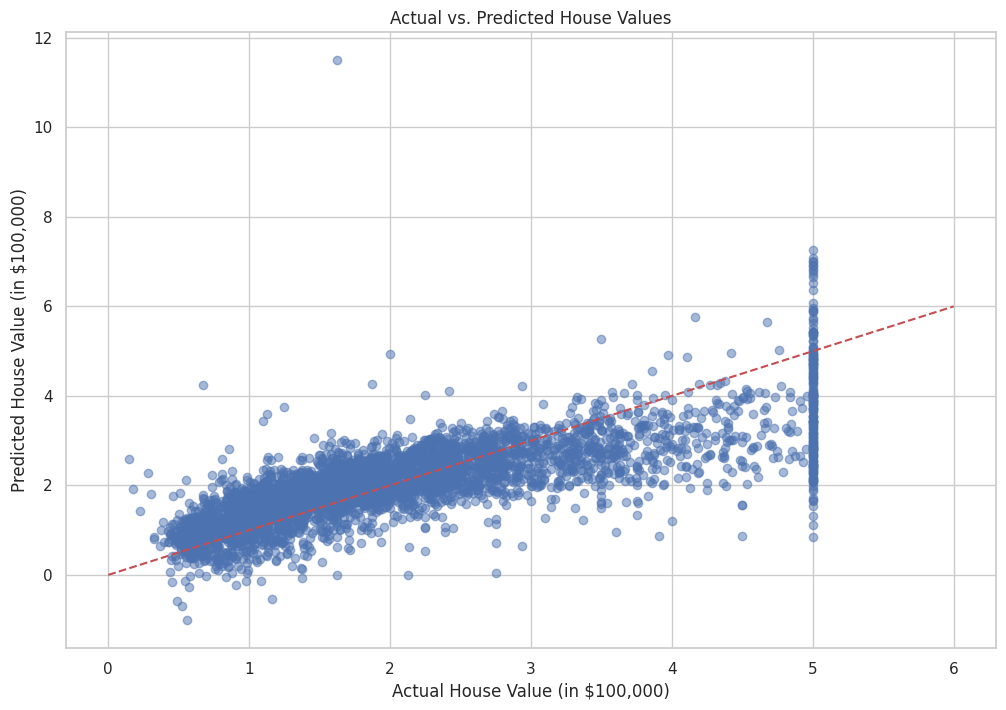

In [15]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([0, 6], [0, 6], 'r--')
plt.xlabel('Actual House Value (in $100,000)')
plt.ylabel('Predicted House Value (in $100,000)')
plt.title('Actual vs. Predicted House Values')
plt.grid(True)
plt.show()

# 8. Model Persistence

Now that we've trained and evaluated our model, let's save it for later use in our API.

In [16]:
# Create directory for model if it doesn't exist
project_root = os.path.dirname(os.getcwd())
model_dir = os.path.join(project_root, 'models')
os.makedirs(model_dir, exist_ok=True)

# Save the model
model_path = os.path.join(model_dir, 'ml_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

logging.info(f"Model saved to {model_path}")

2025-04-23 03:50:54,006 - INFO - Model saved to /app/models/ml_model.pkl


# 9. Model Loading and Inference

Let's verify we can load the model and use it for predictions.

In [17]:
# Load the saved model
loaded_model = pickle.load(open(model_path, 'rb'))

# Test with a sample from our test set
sample_index = 0
sample_features = X_test[sample_index].reshape(1, -1)
actual_value = y_test[sample_index]

# Make prediction
prediction = loaded_model.predict(sample_features)[0]

print(f"Sample features: {sample_features[0]}")
print(f"Actual house value: ${actual_value*100000:.2f}")
print(f"Predicted house value: ${prediction*100000:.2f}")
print(f"Difference: ${(prediction-actual_value)*100000:.2f}")

Sample features: [ 1.68120000e+00  2.50000000e+01  4.19220056e+00  1.02228412e+00
  1.39200000e+03  3.87743733e+00  3.60600000e+01 -1.19010000e+02]
Actual house value: $47700.00
Predicted house value: $71912.28
Difference: $24212.28


# 10. Next Steps

To improve our model, we could consider:

1. Feature engineering
   - Creating ratio features (e.g., rooms per person)
   - Adding polynomial features
   - Binning geographic coordinates

2. Advanced modeling techniques
   - Trying other algorithms (Random Forest, Gradient Boosting)
   - Hyperparameter tuning with GridSearchCV
   - Ensemble methods

3. Model deployment
   - Integrating with the FastAPI application
   - Monitoring model performance over time
   - Implementing scheduled retraining

# 11. Conclusion

In this notebook, we've walked through the complete process of training a machine learning model for predicting California housing prices. We:

1. Loaded and explored the California Housing dataset
2. Prepared the data for model training
3. Trained a linear regression model
4. Evaluated model performance using multiple metrics
5. Saved the model for production use

This model is now ready to be loaded by our FastAPI application to provide housing price predictions through the API.